In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import numpy as np
import pandas as pd
import os
import obspy
import matplotlib.pyplot as plt
import scipy
from obspy import UTCDateTime
from obspy.taup import TauPyModel
import pysmo.aimbat
from PaSTA.data import Event, read_in_events
from PaSTA.plot import fit_line
from PaSTA.data_acquisition import acquire_data

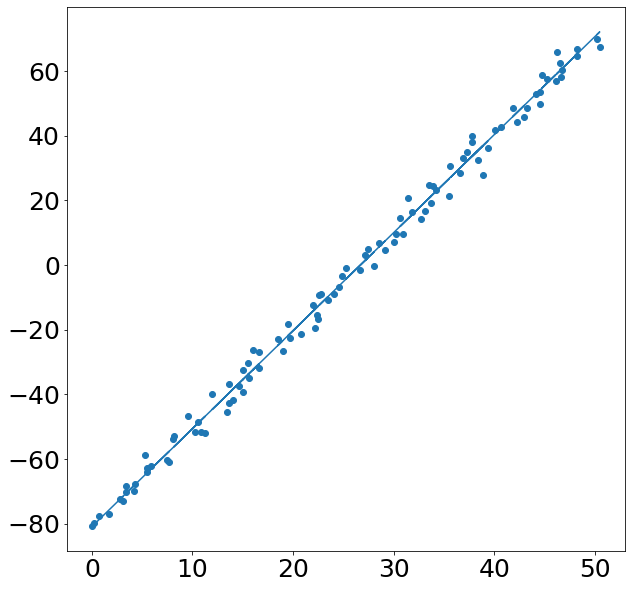

In [30]:
x=np.linspace(0,50,100)
y=3*x-80
x=x+np.random.normal(size=100)
y=y+np.random.normal(size=100)
beta=fit_line(x,y)
y_p=x*beta[0] + beta[1]
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(x,y)
ax.plot(x,y_p)

In [ ]:
acquire_data("2015-08-01","2019-08-01", 5.5, 30, 90, 750, 'ak135', 30, 800, 41.68, 42.18, -73.6, -71.4, 
             '/Users/emasmith/PASTA/',"IRIS","IRIS","XP","*","*","BH?")

** Getting station data from IRIS **
BH?
2015-08-01T00:00:00.000000Z 2019-08-01T00:00:00.000000Z
[1, '41.9423', '-73.4647', 0.222, 'CS01']
[2, '41.9408', '-73.3429', 0.187, 'CS02']
[3, '41.9483', '-73.2623', 0.419, 'CS03']
[4, '41.9085', '-73.0730', 0.317, 'CS04']
[5, '41.9396', '-72.9723', 0.256, 'CS05']
[6, '41.9059', '-72.8686', 0.267, 'CS06']
[7, '41.9025', '-72.7512', 0.027, 'CS07']
[8, '41.9275', '-72.5960', 0.003, 'CS08']
[9, '41.8961', '-72.4908', 0.066, 'CS09']
[10, '41.8973', '-72.3665', 0.258, 'CS10']
[11, '41.9386', '-72.2808', 0.208, 'CS11']
[12, '41.9553', '-72.1153', 0.248, 'CS12']
[13, '41.9667', '-72.0038', 0.206, 'CS13']
[14, '41.9522', '-71.8417', 0.16, 'CS14']
[15, '41.8946', '-71.6551', 0.198, 'CS15']
** Getting event data from IRIS **
568 Event(s) in Catalog:
2015-08-05T09:13:22.720000Z | +16.031,  -93.802 | 5.7 MW
2015-08-07T12:18:47.620000Z |  +1.143,  -85.256 | 5.6 MW
...
2019-07-09T11:33:31.667000Z | +47.428, +145.047 | 5.5 Mww
2019-07-31T05:54:55.289000Z | +1

In [115]:
events = read_in_events(['20162370136','20162420429','20162470327'],'ak135')

In [117]:
test_cat=np.asarray([])
test_cat=np.concatenate((test_cat,np.zeros(50)))

In [119]:
p_residuals=np.asarray([])
s_residuals=np.asarray([])
for event in events:
    p_resid,s_resid = event.get_residuals()
    p_residuals=np.concatenate((p_residuals,np.squeeze(p_resid)))
    s_residuals=np.concatenate((s_residuals,np.squeeze(s_resid)))

In [128]:
'20162370136'[:3]

'201'

In [34]:
event_codes=[]
for code in next(os.walk('../PASTA'))[1]:
    if code[:3] == '201':
        event_codes.append(code)
        
events = read_in_events(event_codes,'ak135')

p_residuals=np.asarray([])
s_residuals=np.asarray([])
for event in events:
    p_resid,s_resid = event.get_residuals()
    p_residuals=np.concatenate((p_residuals,np.squeeze(p_resid)))
    s_residuals=np.concatenate((s_residuals,np.squeeze(s_resid)))

In [ ]:
p_residuals = np.random.normal(50,10,500)
s_residuals = np.random.normal(40,15,500)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(26,13));
    
plt.rcParams.update({
    "font.size": 25})

ax1.hist(p_residuals);
ax2.hist(s_residuals);
ax1.set_title("P wave travel time residuals");
ax2.set_title("S wave travel time residuals");

In [179]:
p_residuals.shape

(614,)

(584,)
(375,)


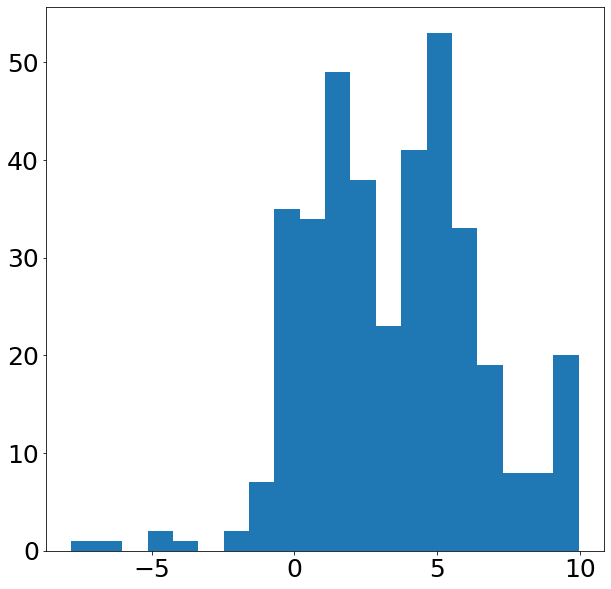

In [35]:
fig,ax=plt.subplots(figsize=(10,10));
mask=np.all([p_residuals < 10, p_residuals > -10],axis=0)
print(mask.shape)
small_p=np.squeeze(p_residuals[mask])
print(small_p.shape)
ax.hist(small_p,bins=20);

In [7]:
model = TauPyModel(model='ak135')
arrival = model.get_travel_times(source_depth_in_km=55,
                                  distance_in_degree=67,phase_list=["P"])
print(type(arrival[0].time))

<class 'numpy.float64'>


In [125]:
[x[0] for x in os.walk('PASTA')]

['PASTA',
 'PASTA/__pycache__',
 'PASTA/.ipynb_checkpoints',
 'PASTA/Tx_curve',
 'PASTA/Tx_curve/.ipynb_checkpoints']

In [182]:
next(os.walk('20191650019'))[1]

['CS15',
 'CS14',
 'CS09',
 'CS07',
 'CS01',
 'CS11',
 'CS10',
 '.ipynb_checkpoints',
 'CS03']

In [72]:
a=pd.read_csv("20162370136/evinfo",sep="\s",engine='python',header=None)

In [73]:
event_path='20191650019'
print(event_path + "/evinfo")

20191650019/evinfo


In [76]:
a.loc[0,:]

0         CS02
1         2016
2            8
3           24
4            1
5           36
6        32.87
7       42.723
8            "
9     13.1877"
10        4.44
11         6.2
12     60.9791
13     57.0614
Name: 0, dtype: object

In [85]:
if np.any(a.loc[0,:]=='''"'''):
    col_to_destroy=np.argwhere(a.loc[0,:]=='''"''')
    a=a.drop(columns=col_to_destroy[0][0])

In [91]:
a

,0,1,2,3,4,5,6,7,9,10,11,12,13
0,CS02,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.9791,57.0614
1,CS03,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.9246,57.1006
2,CS04,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.8277,57.1659
3,CS05,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.7478,57.2250
4,CS06,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.7010,57.2550
5,CS07,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.6292,57.3052
6,CS08,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.5184,57.3855
7,CS10,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.3905,57.4722
8,CS12,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.2015,57.6106
9,CS13,2016,8,24,1,36,32.87,42.723,"13.1877""",4.44,6.2,60.1252,57.6651


In [90]:
a.iloc[0,9]

4.4400000000000004

In [391]:
a.iloc[:,11]["CS03"]

71.623599999999996

In [361]:
test_df.loc[:,"CS12"]=my_test[0].data

In [369]:
np.any(np.isnan(test_df.loc[:,"CS05"]))

True

In [36]:
my_test = obspy.read('20190872206/CS03/STACK_R')
my_test1 = obspy.read('20190872206/CS03/STACK_Z')
my_test2 = obspy.read('20190872206/CS03/STACK_T')
my_test_2 = obspy.read('20190872206/CS03/STACK_R')
my_test1_2 = obspy.read('20190872206/CS03/STACK_Z')
my_test2_2 = obspy.read('20190872206/CS03/STACK_T')

In [41]:
type(my_test1[0])

obspy.core.trace.Trace

In [39]:
my_test2[0].stats.sac.user1

1.0

In [200]:
my_test1[0].stats.starttime

2019-03-28T22:18:10.700000Z

In [201]:
my_test2[0].stats.sampling_rate

40.0

In [8]:
arrival = model.get_travel_times(source_depth_in_km=8.96,
                                              distance_in_degree=76.6742, phase_list=["P","S"])
            
pred_time=arrival[1].time - arrival[0].time + 30





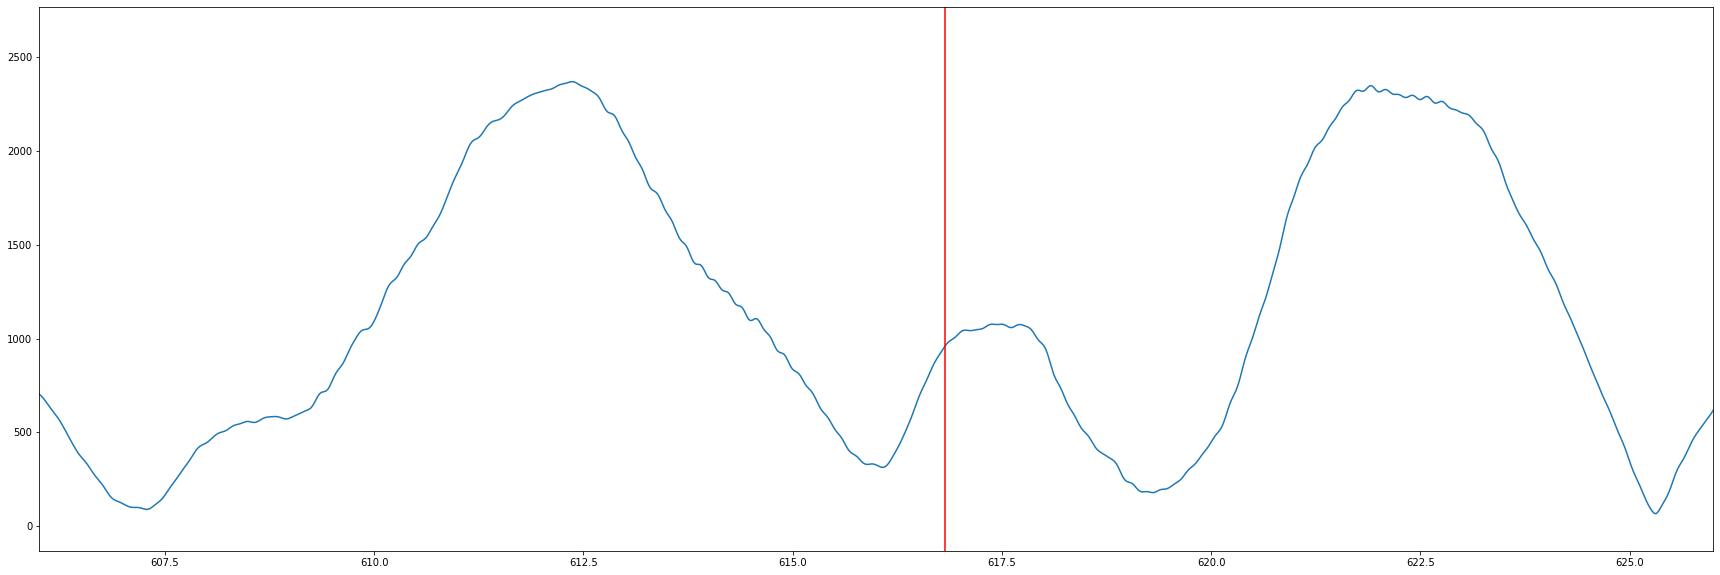

In [9]:
fig,ax=plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].stats.npts/my_test[0].stats.sampling_rate,my_test[0].stats.npts),np.sqrt((my_test2[0].data**2)+(my_test[0].data**2)))
ax.axvline(pred_time,color='r')
ax.axvline(580,color='k')
ax.set_xlim(606,626);

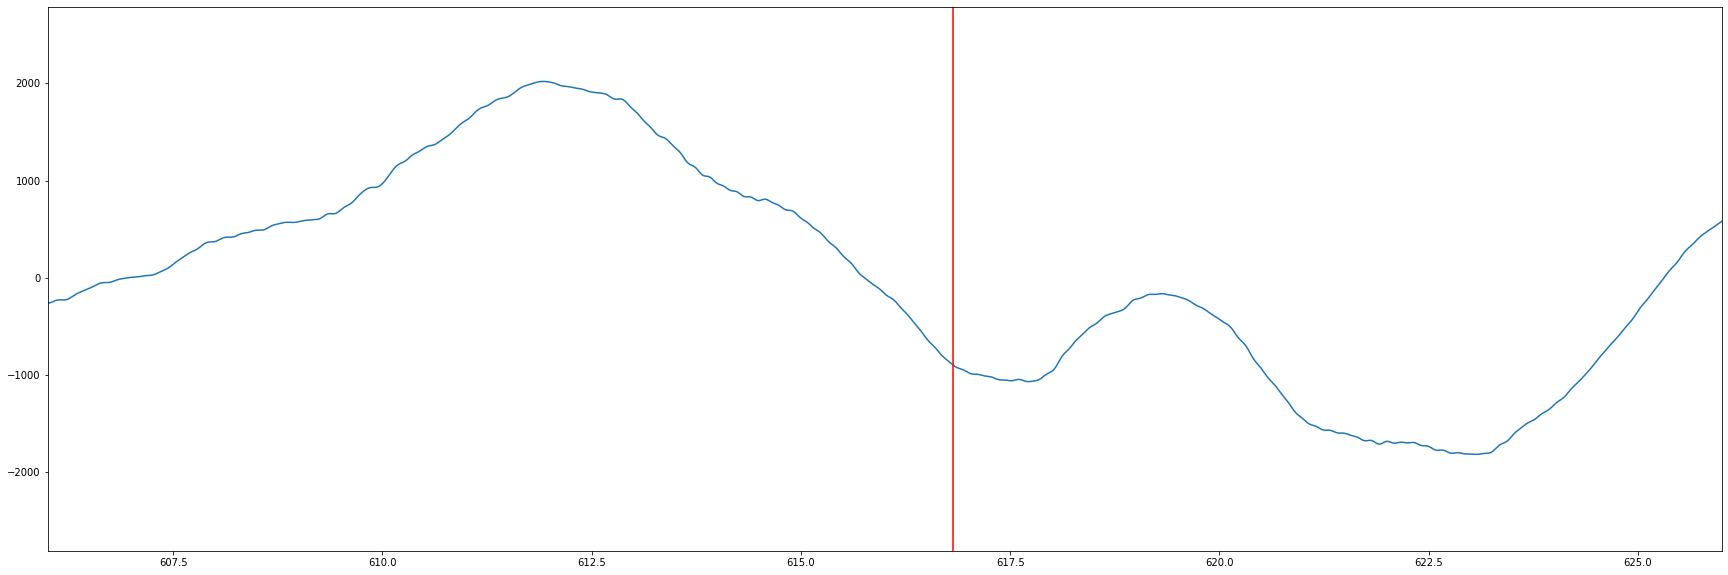

In [12]:
fig,ax=plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].stats.npts/my_test[0].stats.sampling_rate,my_test[0].stats.npts),my_test[0].data)
ax.axvline(pred_time,color='r')
ax.axvline(580,color='k')
ax.set_xlim(606,626);

In [216]:
scipy.signal.correlate()

616.81370237622957

In [ ]:
my_test[0].data

In [24]:
a=my_test[0].stats.starttime

In [24]:
type(c)

float

In [37]:
c=np.float64(2.5)
b=c+my_test[0].stats.starttime 
print(type(c))
print(b-a)

TypeError: unsupported operand type(s) for +: 'float' and 'UTCDateTime'

In [19]:
st = my_test[0].stats.starttime
print(type(st))

<class 'obspy.core.utcdatetime.UTCDateTime'>


In [239]:
my_test2[0].stats.starttime<my_test[0].stats.starttime

False

In [102]:
np.max(my_test[0].data)

4507.7842

In [103]:
np.max(np.absolute(my_test[0].data))

4782.4146

/Users/emasmith/anaconda3/lib/python3.7/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/emasmith/anaconda3/lib/python3.7/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


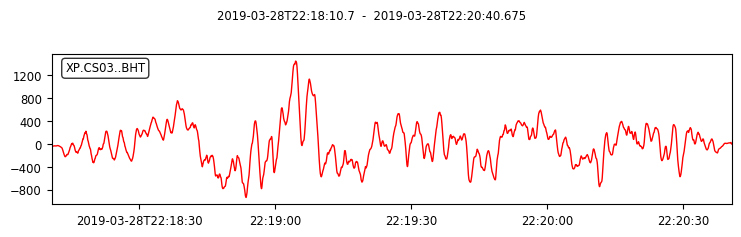

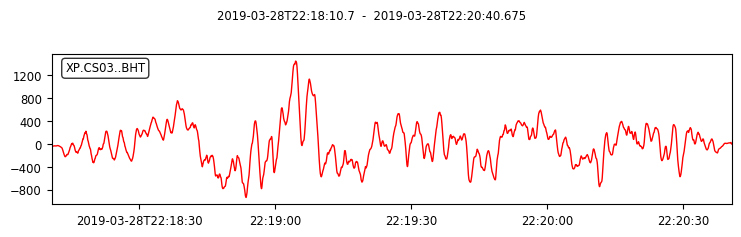

In [160]:
my_test.plot(color='red', number_of_ticks=7)

In [100]:
my_test[0].stats

         network: XP
         station: CS03
        location: 
         channel: BHZ
       starttime: 2019-06-14T00:30:03.875000Z
         endtime: 2019-06-14T00:32:33.850000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 6000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -4782.4146, 'depmax': 4507.7842, 'scale': 1.0, 'b': 0.0, 'e': 149.97501, 'user0': 0.054184917, 'user1': 1.0, 'user2': 1.0, 'user3': 1.0, 'depmen': 0.68354815, 'nzyear': 2019, 'nzjday': 165, 'nzhour': 0, 'nzmin': 30, 'nzsec': 3, 'nzmsec': 875, 'nvhdr': 6, 'npts': 6000, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'CS03', 'kcmpnm': 'BHZ', 'knetwk': 'XP'})

In [128]:
scipy.signal.correlate(my_test[0].data,my_test2[0].data)

array([ -0.5207675,  -4.433548 , -18.619844 , ...,  12.057808 ,
         3.932946 ,   0.5631066], dtype=float32)

In [153]:
time_diff = my_test[0].stats.starttime-my_test2[0].stats.starttime

In [282]:
print(my_test2[0].stats.starttime)
print(my_test[0].stats.starttime)

2019-03-28T22:18:12.250000Z
2019-03-28T22:18:10.700000Z


In [385]:
h=my_test[0].stats.starttime

In [386]:
h==my_test[0].stats.starttime

True

In [154]:
begin_zeros=np.zeros(my_test[0].stats.sampling_rate*time_diff)

TypeError: 'float' object cannot be interpreted as an integer

In [284]:
pad=np.zeros(1.55*my_test2[0].stats.sampling_rate)
test2_data=np.concatenate(pad,my_test2[0].data)
test2_data.size

TypeError: 'float' object cannot be interpreted as an integer

In [304]:
np.linspace(0,my_test[0].data.size-1,
                     my_test[0].stats.npts)

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         5.99700000e+03,   5.99800000e+03,   5.99900000e+03])

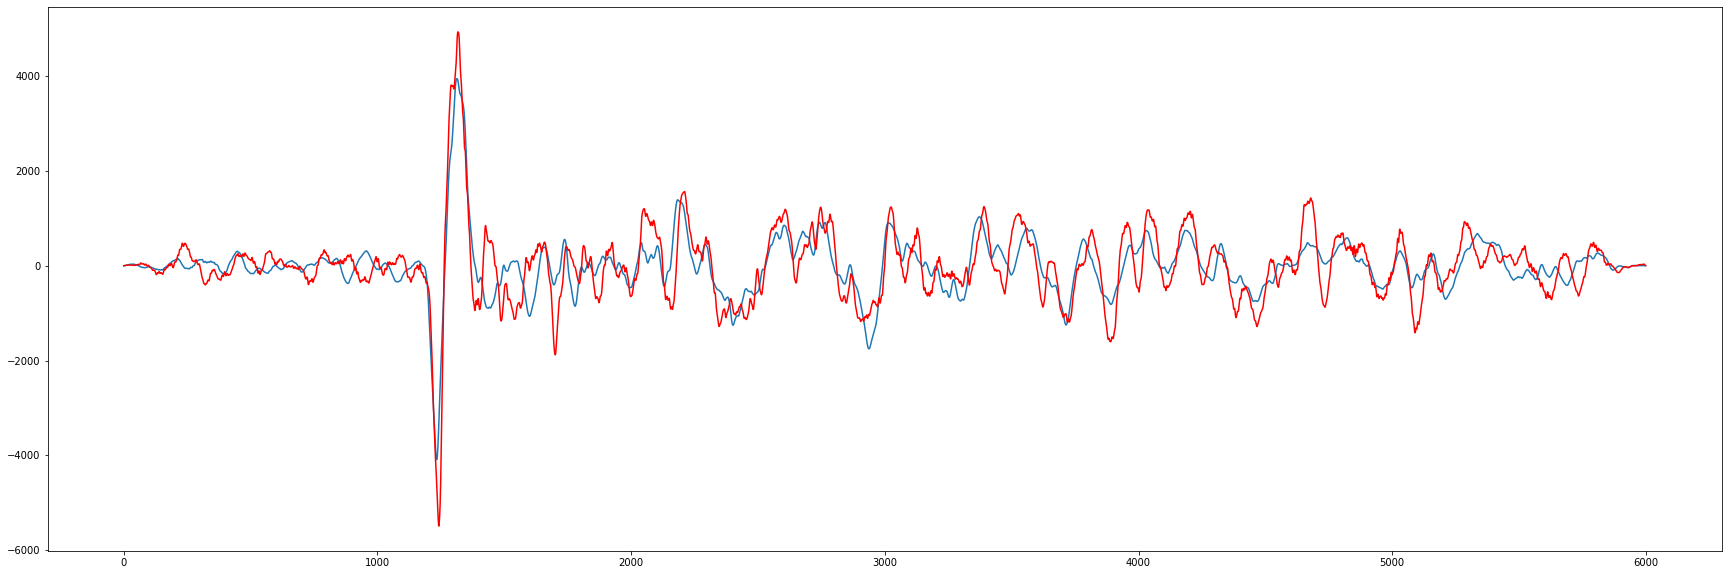

In [305]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].data.size-1,
                     my_test[0].stats.npts),my_test[0].data)
ax.plot(np.linspace(0,my_test2[0].data.size-1,
                     my_test2[0].stats.npts),my_test2[0].data,color='r')

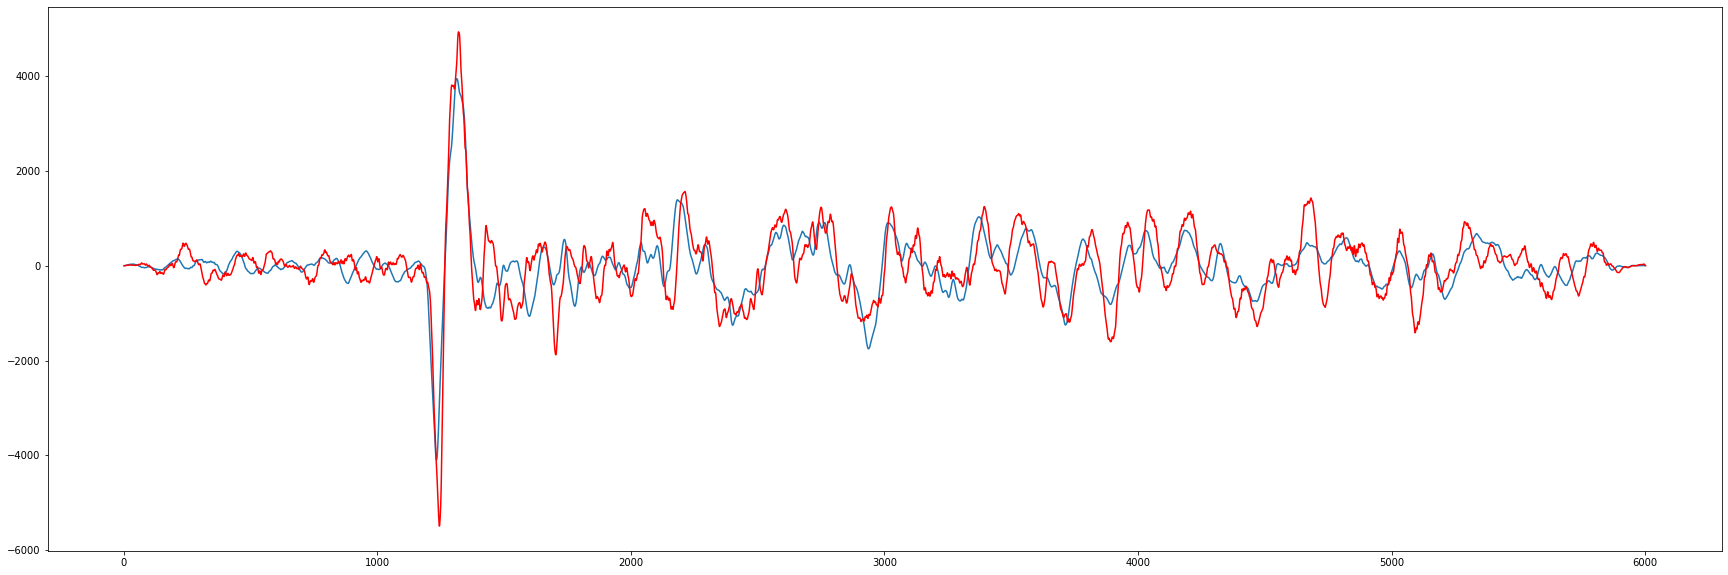

In [306]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].data.size-1,
                     my_test[0].stats.npts),my_test[0].data)
ax.plot(np.linspace(3,my_test2[0].data.size-1+3,
                     my_test2[0].stats.npts),my_test2[0].data,color='r')

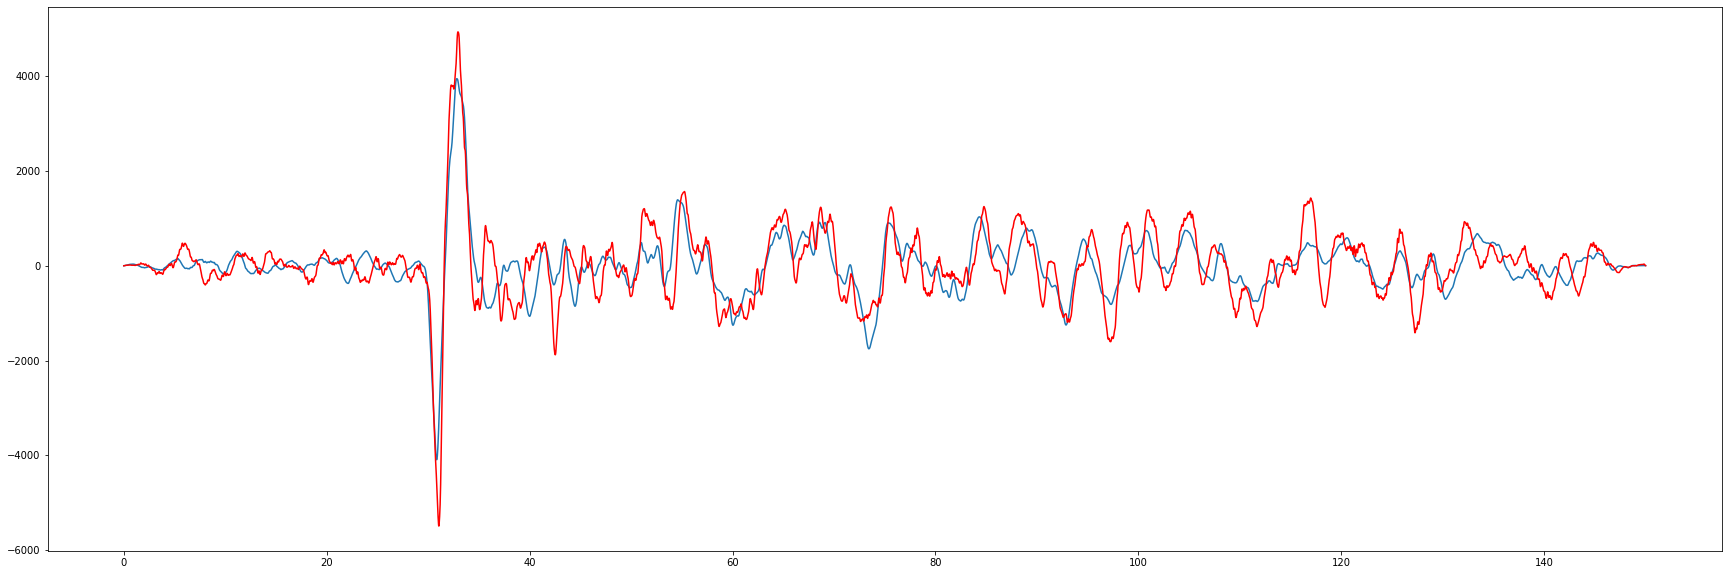

In [258]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].stats.npts/my_test[0].stats.sampling_rate,
                     my_test[0].stats.npts),my_test[0].data)
ax.plot(np.linspace(0,my_test2[0].stats.npts/my_test2[0].stats.sampling_rate,
                     my_test2[0].stats.npts),my_test2[0].data,color='r')

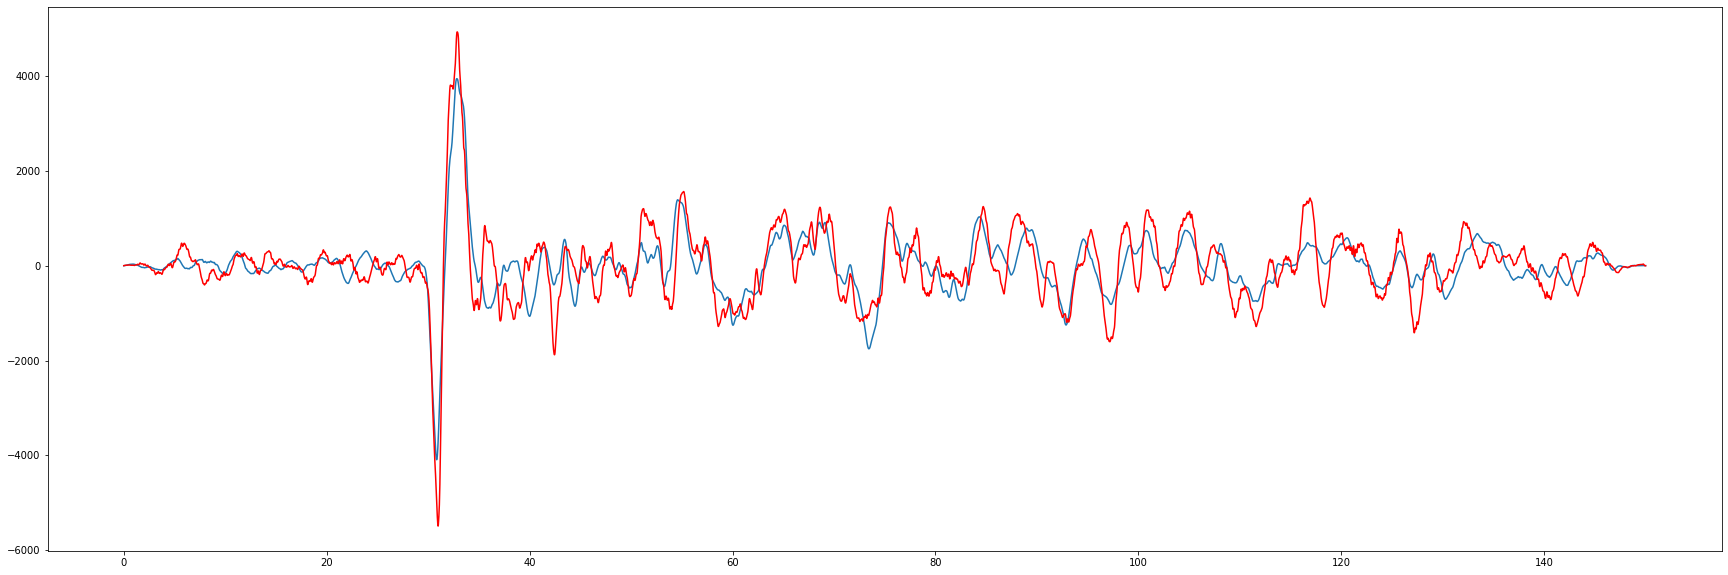

In [328]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].stats.npts/my_test[0].stats.sampling_rate,
                     my_test[0].stats.npts),my_test[0].data)
ax.plot(np.linspace(0,my_test2[0].stats.npts/my_test2[0].stats.sampling_rate,
                     my_test2[0].stats.npts),new_x2,color='r')

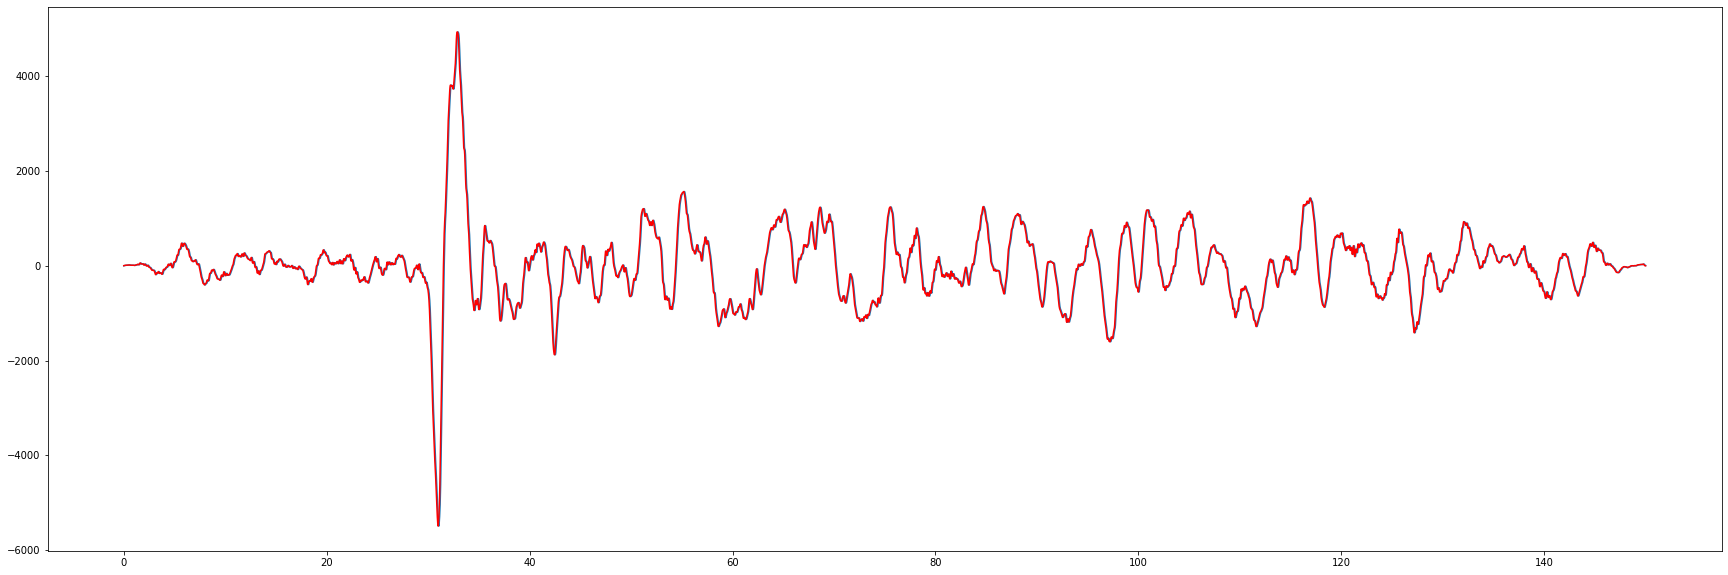

In [329]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test2[0].stats.npts/my_test2[0].stats.sampling_rate,
                     my_test2[0].stats.npts),my_test2[0].data)
ax.plot(np.linspace(0,my_test2[0].stats.npts/my_test2[0].stats.sampling_rate,
                     my_test2[0].stats.npts),new_x2,color='r')

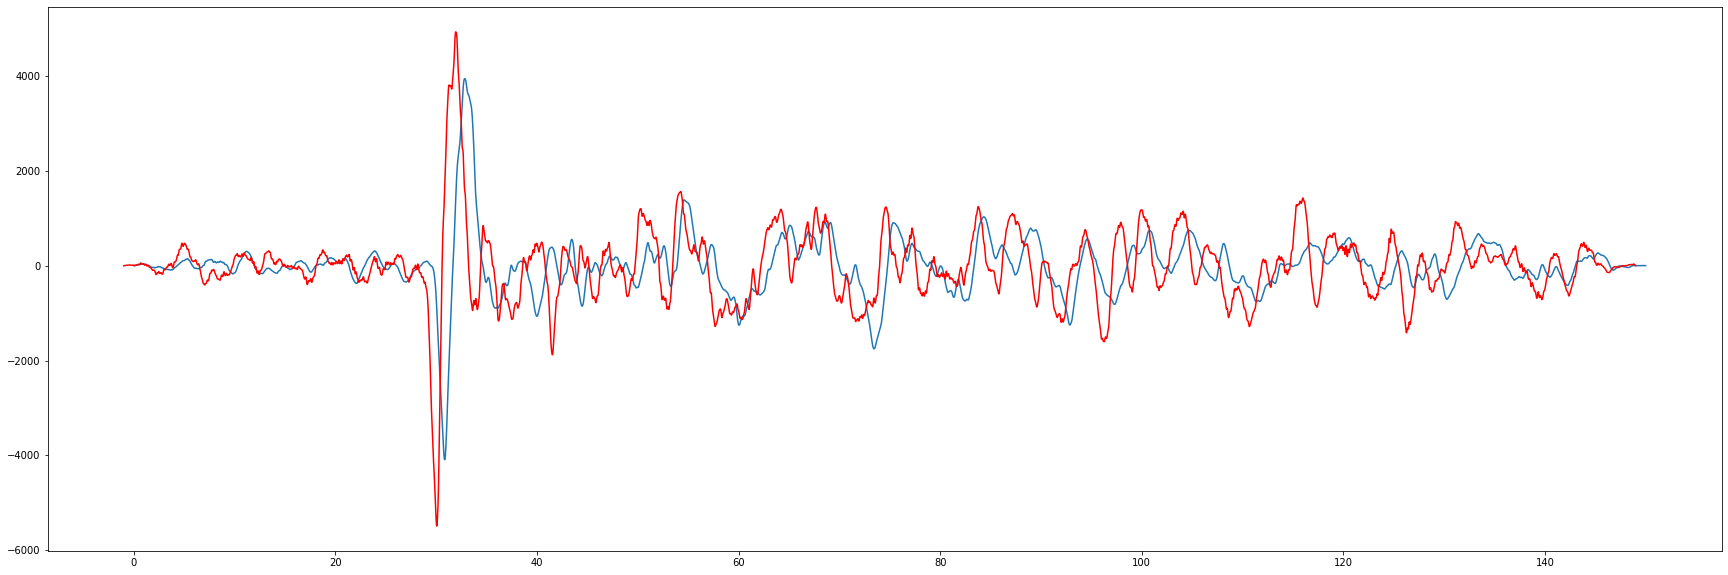

In [327]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test[0].stats.npts/my_test[0].stats.sampling_rate,
                     my_test[0].stats.npts),my_test[0].data)
ax.plot(np.linspace(-1,my_test2[0].stats.npts/my_test2[0].stats.sampling_rate-1,
                     my_test2[0].stats.npts),my_test2[0].data,color='r')

In [247]:
absolute_max = np.max(np.absolute(my_test2[0].data))
my_ind=np.argwhere(np.absolute(my_test2[0].data)==absolute_max)[0][0]

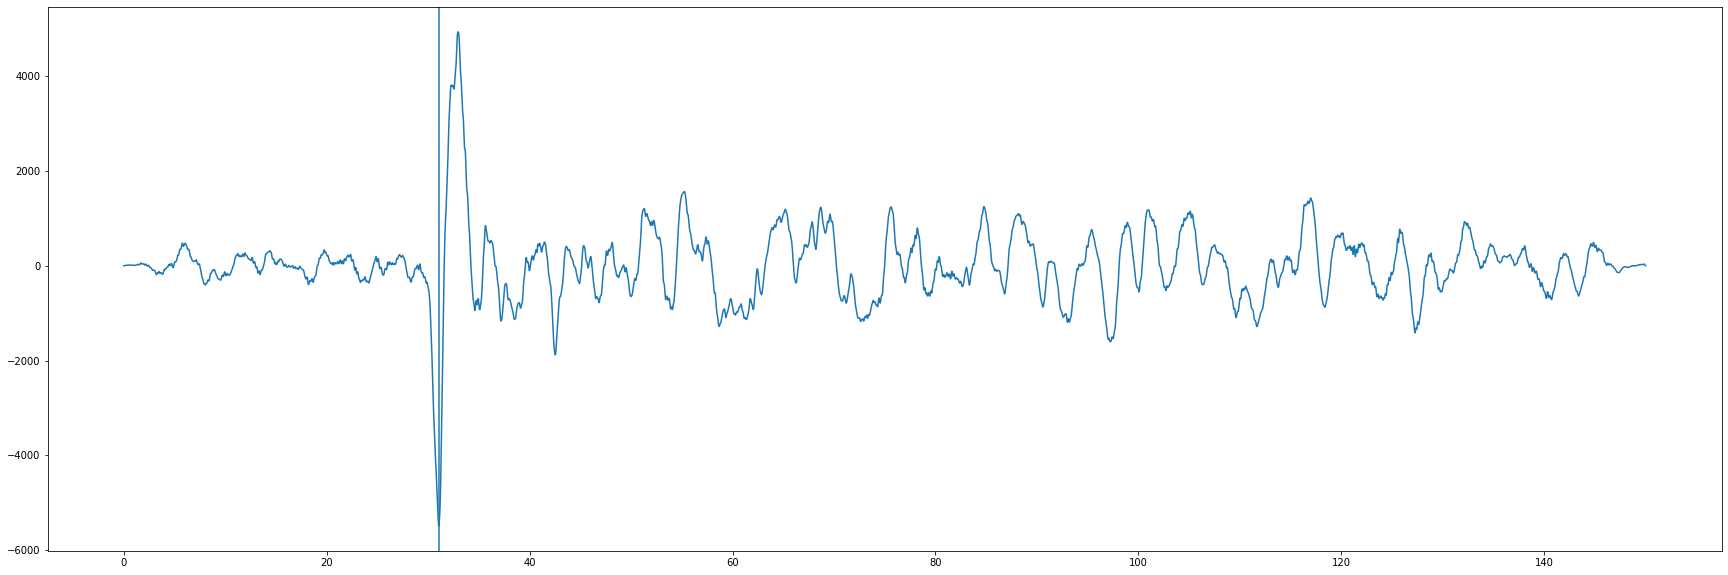

In [249]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.linspace(0,my_test2[0].stats.npts/my_test2[0].stats.sampling_rate,
                     my_test2[0].stats.npts),my_test2[0].data)
ax.axvline(my_ind/my_test2[0].stats.sampling_rate)

In [317]:
np.concatenate((my_test[0].data[-3:],my_test[0].data[:-3])).size

6000

In [371]:
my_test[0].data.size

6000

In [324]:
new_x2=np.concatenate((my_test2[0].data[3:],my_test2[0].data[:3]))

In [372]:
my_corr = scipy.signal.correlate(my_test[0].data,new_x2)

In [286]:
np.max(my_corr)

2.3953702e+09

In [301]:
my_corr.size

11999

In [373]:
np.argwhere(np.max(my_corr)==my_corr)[0][0]

5999

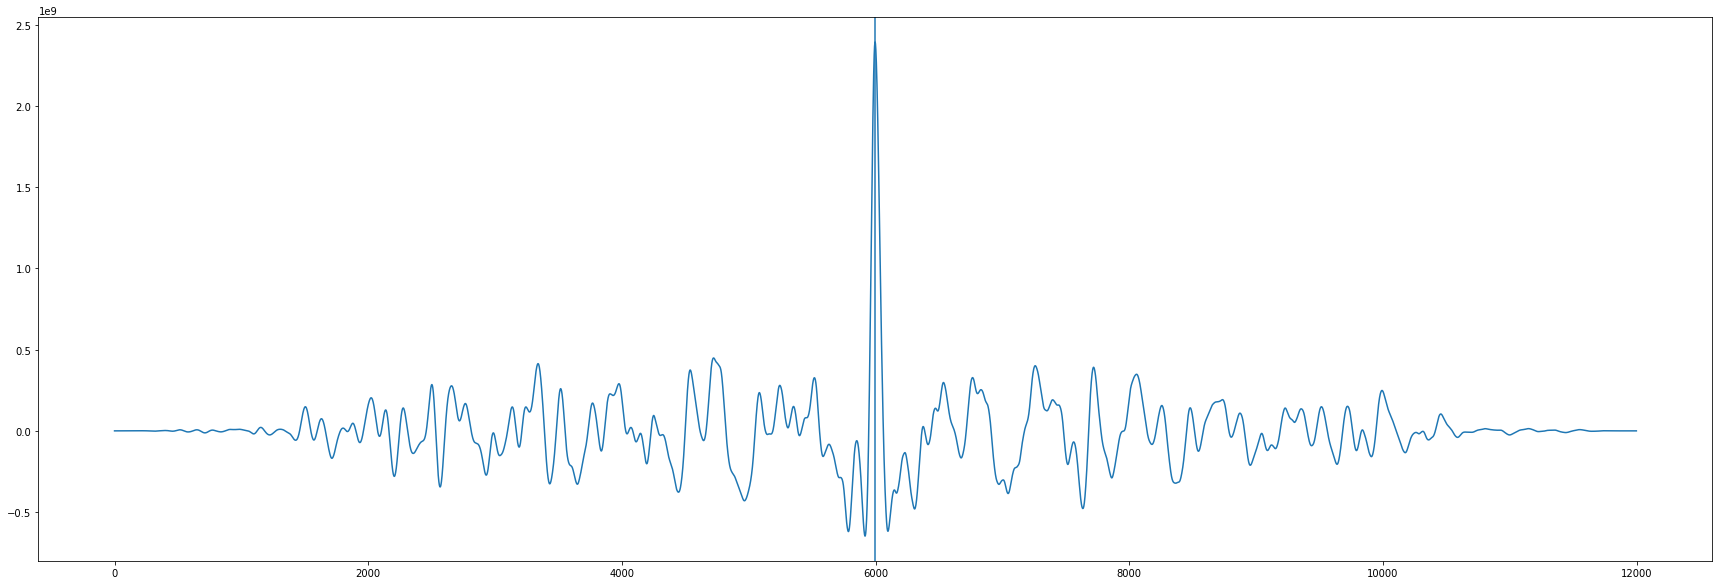

In [297]:
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(np.arange(my_corr.size),my_corr)
ax.axvline(np.argwhere(np.max(my_corr)==my_corr)[0][0])

In [193]:
event='20182500212'

In [194]:
sta_list=next(os.walk(event))[1]

In [264]:
my_corr[6000]

3.7224973e+09

In [197]:
stacks=[obspy.read(event + '/' + sta + '/STACK_Z') for sta in sta_list]

In [198]:
time_diffs = [stack[0].stats.starttime - stacks[0][0].stats.starttime for stack in stacks]
print(time_diffs)

[0.0, 0.0, 0.25, 0.2, -1.025, -1.1, -1.325, -0.675, -1.1, -0.925]


In [204]:
isinstance(ack, str)

True

In [210]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times(source_depth_in_km=100,
                                  distance_in_degree=45,
                                  phase_list=["P", "S"])

In [211]:
for arr in arrivals:
    

2 arrivals
	P phase arrival at 485.210 seconds
	S phase arrival at 876.834 seconds


In [216]:
a.index=a[0]
a.iloc[:,11]['CS03']

71.623599999999996

In [332]:
a is None

False

In [336]:
c='ant'

In [337]:
print(c)

ant


In [347]:
'ant'==c

True